In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import tensorflow as tf
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
tf.random.set_seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 9.13 s, sys: 1.68 s, total: 10.8 s
Wall time: 20.4 s


# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Atrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-A-train.csv")
Btrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-B-train.csv")
#Ctrain = pd.read_csv("/kaggle/input/cashdset/SubTask-C-train.csv")

Aval_tweet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CASE@EACL2024/SubTask-A-(index,tweet)val.csv')
Aval_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CASE@EACL2024/SubTask-A(index,label)val.csv')

Bval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-B(index,tweet)val.csv')
Bval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-B(index,label)val.csv')

#Cval_tweet = pd.read_csv('/kaggle/input/cashdset/SubTask-C(indexlabel)val.csv')
#Cval_label = pd.read_csv('/kaggle/input/cashdset/SubTask-C(indexlabel)val.csv')

Atest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-A-(index,tweet)test.csv')
Atestlabel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-A(index,label)test.csv')
Btest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/SubTask-B(index,tweet)test.csv')
#Ctest = pd.read_csv('/kaggle/input/cashdset/SubTask-C(indextweet)test.csv')


In [ ]:
Atest['label']=Atestlabel['label']

In [ ]:
print("Total number of training samples train set - task 1:", len(Atrain))
print("Total number of training samples dev set - task 1:", len(Aval_tweet))
print("Total number of training samples test set - task 1:", len(Atest))


Total number of training samples train set - task 1: 7284
Total number of training samples dev set - task 1: 1561
Total number of training samples test set - task 1: 1562


In [ ]:
print("Total number of training samples train set - task 2:", len(Btrain))
print("Total number of training samples dev set - task 2:", len(Bval_tweet))
print("Total number of training samples test set - task 2:", len(Btest))

Total number of training samples train set - task 2: 699
Total number of training samples dev set - task 2: 150
Total number of training samples test set - task 2: 150


In [ ]:
# print("Total number of training samples train set - task 3:", len(Ctrain))
# print("Total number of training samples dev set - task 3:", len(Cval_tweet))
# print("Total number of training samples test set - task 3:", len(Ctest))

In [ ]:
Atrain.head()

,index,tweet,label
0,10001,Burning native forest wood waste for electrici...,0
1,10002,November is here!!! \nIt's a new chance for yo...,0
2,10003,Fight For Climate Justice At Queen's Park. In...,0
3,10005,We all need to rise up and speak at a time lik...,0
4,10006,Fridays For Future Week 88🌍 \n\n#PeopleNotProf...,0


In [ ]:
Atrain.tail()

,index,tweet,label
7279,20399,"Fridays for Future :: Nov 18, Noon - Palo Alto...",0
7280,20400,Global #ClimateStrike today! #TakeAction on #C...,0
7281,20403,No more empty promises\nStop the funding Of No...,0
7282,20404,Young people are not only victims of climate c...,0
7283,20406,#FridaysForFuture #EverydayForFuture Here I am...,0


In [ ]:
Atest.head()

,index,tweet,label
0,10000,british govt/msm sheer hypocrisy!!! ‘Out of re...,1
1,10004,This #FridaysForFuture on Zoom we will get boo...,1
2,10012,The #ecoteam at SMAB have been busy today! The...,0
3,10015,The fight against climate justice is for both ...,0
4,10031,The world needs more environmentalists \n#biod...,0


In [ ]:
Aval_tweet.head(5)

,index,tweet
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...
1,10042,Do we really have an average of 6-7 years to c...
2,10044,today it's #climatestrike Again&amp;Again #Unt...
3,10067,Join the Global #ClimateStrike on September 23...
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...


In [ ]:
Aval_label.head(5)

,index,label
0,10023,0
1,10042,0
2,10044,0
3,10067,0
4,10083,0


In [ ]:
# Get the unique identifiers from both dataframes
identifiers_tweet = set(Aval_tweet['index'])
identifiers_label = set(Aval_label['index'])

# Find common identifiers using intersection
common_identifiers = identifiers_tweet.intersection(identifiers_label)

# Print common identifiers
print("Common Identifiers:", common_identifiers)

# Check if there are any common identifiers
if common_identifiers:
    print("There are common identifiers.")
else:
    print("No common identifiers found.")


Common Identifiers: {16385, 16389, 16391, 16396, 16404, 16407, 16416, 16425, 16432, 16433, 16436, 16458, 16464, 16465, 16467, 16486, 16492, 16499, 16505, 16506, 16533, 16553, 16558, 16560, 16561, 16564, 16565, 16568, 16578, 16579, 16593, 16604, 16607, 16616, 16619, 16622, 16624, 16631, 16652, 16663, 16667, 16668, 16669, 16682, 16695, 16697, 16701, 16714, 16719, 16720, 16722, 16723, 16731, 16734, 16735, 16739, 16742, 16743, 16750, 16752, 16759, 16766, 16775, 16778, 16790, 16791, 16803, 16814, 16815, 16827, 16841, 16846, 16875, 16878, 16880, 16881, 16882, 16898, 16902, 16909, 16916, 16924, 16925, 16932, 16934, 16941, 16946, 16954, 16959, 16961, 17000, 17005, 17007, 17011, 17021, 17028, 17030, 17040, 17042, 17067, 17083, 17086, 17091, 17094, 17112, 17120, 17123, 17133, 17147, 17160, 17164, 17168, 17169, 17175, 17192, 17194, 17212, 17216, 17218, 17226, 17227, 17229, 17231, 17255, 17258, 17265, 17266, 17282, 17283, 17289, 17291, 17299, 17302, 17304, 17306, 17316, 17333, 17343, 17347, 17363,

In [ ]:
import pandas as pd

# Assuming 'identifier' is the common column in both dataframes
# Concatenate Aval_tweet and Aval_label along columns (axis=1)
Aval = pd.concat([Aval_tweet.set_index('index'), Aval_label.set_index('index')], axis=1)

# Drop any rows with NaN values (if any)
Aval = Aval.dropna()

# Reset the index to make 'identifier' a regular column again
Aval.reset_index(inplace=True)

# Print the resulting DataFrame
Aval

,index,tweet,label
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...,0
1,10042,Do we really have an average of 6-7 years to c...,0
2,10044,today it's #climatestrike Again&amp;Again #Unt...,0
3,10067,Join the Global #ClimateStrike on September 23...,0
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...,0
...,...,...,...
1556,20376,"The #ClimateCrisis tide continues to rise, fol...",0
1557,20378,"#GlobalClimateStrike in Lagos,Nigeria today ev...",0
1558,20392,#Greenwashing #Renewables #ClimateStrike #Exti...,1
1559,20402,#ExtinctionRebellion #ClimateCrisis #Clima...,1


In [ ]:
import pandas as pd

# Assuming 'identifier' is the common column in both dataframes
# Concatenate Aval_tweet and Aval_label along columns (axis=1)
Bval = pd.concat([Bval_tweet.set_index('index'), Bval_label.set_index('index')], axis=1)

# Drop any rows with NaN values (if any)
Bval = Bval.dropna()

# Reset the index to make 'identifier' a regular column again
Bval.reset_index(inplace=True)

# Print the resulting DataFrame
Bval

,index,tweet,label
0,10134,#ClimateChange #Greenwashing #Renewables #Cli...,1
1,10165,This can be the result when a workplace does n...,2
2,10209,#dreadlocks is trending in Germany because #fr...,2
3,10356,#FridaysForFuture #ClimateChange #Renewables #...,1
4,10423,@Shevans9104 @paulmurphy_TD You could always g...,1
...,...,...,...
145,20261,#Renewables #Greenwashing #ClimateStrike #Ext...,1
146,20318,https://t.co/QruGYeQgcp https://t.co/DOk69KYYu...,2
147,20340,#ClimateCrisis #GlobalWarming #ClimateChange #...,1
148,20392,#Greenwashing #Renewables #ClimateStrike #Exti...,1


# Merge the task B hate dataset with the current Dataset

In [ ]:
# Assuming 'tweet' is the column you want to compare
tweets_A = set(Atrain['tweet'])
tweets_B = set(Btrain['tweet'])

# Find common samples
common_tweets = tweets_A.intersection(tweets_B)

# Count the number of common samples
num_common_tweets = len(common_tweets)

# Display the result
print(f"Number of common samples between Atrain and Btrain: {num_common_tweets}")


Number of common samples between Atrain and Btrain: 462


In [ ]:
# Assign label of 1 to Bval samples and concatenate
Bval['label'] = 1
Atrain = pd.concat([Atrain, Bval[['index', 'tweet', 'label']]], ignore_index=True)

# Assign label of 1 to Btrain samples and concatenate
Btrain['label'] = 1
Atrain = pd.concat([Atrain, Btrain[['index', 'tweet', 'label']]], ignore_index=True)

# Shuffle the dataframe to mix samples from Atrain and Btrain
# Atrain = Atrain.sample(frac=1).reset_index(drop=True)


In [ ]:
Btest['label'] = 1
Atrain = pd.concat([Atrain, Btest[['index', 'tweet', 'label']]], ignore_index=True)

In [ ]:
Atrain['label'].value_counts()

0    6385
1    1898
Name: label, dtype: int64

In [ ]:
Atrain.tail(5)

,index,tweet,label
8278,19860,#ClimateStrike #ExtinctionRebellion #ClimateAc...,1
8279,19880,#ClimateStrike #ExtinctionRebellion #ClimateA...,1
8280,19973,#FridaysForFuture #ClimateChange #Renewables #...,1
8281,20363,#ExtinctionRebellion #ClimateCrisis #Climate...,1
8282,20391,#ClimateChange #Greenwashing #Renewables #Cli...,1


# Data Set Analysis

In [ ]:
print(Atrain['label'].value_counts())
print(Aval_label['label'].value_counts())

0    6385
1    1898
Name: label, dtype: int64
0    1371
1     190
Name: label, dtype: int64


In [ ]:
train_corpus = Atrain["tweet"].sum()
test_corpus = Atest["tweet"].sum()
#test_corpus

In [ ]:
import re

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 29531
Number of unique words in test data: 9970
Number of out-of-vocabulary (OOV) words: 4046


In [ ]:
filtered_train = Atrain[lambda x: x["tweet"].str.contains("[^A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

,index,tweet,label
8278,19860,#ClimateStrike #ExtinctionRebellion #ClimateAction #ClimateCrisis #GlobalWarming #FridaysForFuture #ClimateChange #Renewables #Greenwashing \n\nYou've been fooled by Greta Thunberg:,1
8279,19880,#ClimateStrike #ExtinctionRebellion #ClimateAction #ClimateCrisis #GlobalWarming #FridaysForFuture #ClimateChange #Renewables #Greenwashing \n\nYou've been fooled by Greta Thunberg:,1
8280,19973,#FridaysForFuture #ClimateChange #Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming \n\nYou've been fooled by Greta Thunberg:,1
8281,20363,#ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming #FridaysForFuture #ClimateChange #Greenwashing #Renewables #ClimateStrike \n\nYou've been fooled by Greta Thunberg:,1
8282,20391,#ClimateChange #Greenwashing #Renewables #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming #FridaysForFuture \n\nYou've been fooled by Greta Thunberg:,1


In [ ]:
filtered_train.shape

(8283, 3)

In [ ]:
filtered_train.shape

(8283, 3)

In [ ]:
import pandas as pd
import re

# Assuming 'tweet' is the column where you want to find and count similar URLs
tweets = Atrain['tweet']

# Define a regular expression to extract URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Extract URLs from each tweet
all_urls = [url_pattern.findall(tweet) for tweet in tweets]

# Flatten the list of lists into a single list
all_urls_flat = [url for sublist in all_urls for url in sublist]

# Create a DataFrame to count the occurrences of each URL
url_df = pd.DataFrame(all_urls_flat, columns=['URL'])
url_frequency = url_df['URL'].value_counts()

# Display the count of occurrences for each unique URL
print("URL Frequency:")
print(url_frequency)


URL Frequency:
https://t.co/26T1X3q8V8    10
https://t.co/p9Y5Cv5hrh     8
https://t.co/16v1D8AO1r     7
https://t.co/5NjMYlDUn8     6
https://t.co/w9adRhI5PN     6
                           ..
https://t.co/LgNJZuzvb0     1
https://t.co/GW9mLibciw     1
https://t.co/kk9UtBgEcW     1
https://t.co/qQ6TZDp5sA     1
https://t.co/y28248UskW     1
Name: URL, Length: 5393, dtype: int64


In [ ]:
import pandas as pd
import re

# Assuming 'tweet' is the column where you want to find and compare URLs
train_tweets = Atrain['tweet']
test_tweets = Atest['tweet']

# Define a regular expression to extract URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Extract URLs from each tweet in train dataset
train_urls = [url_pattern.findall(tweet) for tweet in train_tweets]
train_urls_flat = [url for sublist in train_urls for url in sublist]

# Extract URLs from each tweet in test dataset
test_urls = [url_pattern.findall(tweet) for tweet in test_tweets]
test_urls_flat = [url for sublist in test_urls for url in sublist]

# Find common URLs between train and test datasets
common_urls = set(train_urls_flat).intersection(test_urls_flat)

# Display common URLs
# print("Common URLs:")
# print(common_urls)

num_common_urls = len(common_urls)
print(f"Number of common URLs: {num_common_urls}")


Number of common URLs: 86


# Preprocessing

In [ ]:
# import re
# from collections import Counter

# # Assuming Atrain['tweet'] is a pandas Series containing the tweets
# all_tokens = []

# for tweet in Atrain['tweet']:
#     # Find all tokens starting with a hash(#) or at the rate(@) and followed by some number of alphabets or numbers
#     matches = re.findall(r'[@#][_a-zA-Z0-9]+', tweet)

#     # Extend the list of all tokens with the matches for each tweet
#     all_tokens.extend(matches)

# # Count the occurrences of each token
# token_counts = Counter(all_tokens)

# # Display tokens sorted by count
# sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# for token, count in sorted_tokens:
#     print(f"{token}: {count}")


In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u00C0-\u017F"          #latin
        u"\u2000-\u206F"          #generalPunctuations
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030" "]+", re.UNICODE)

    text = text.lower()
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, ' ', text)

    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'(https|http|www)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)
    # emoji removal
    text = emoji.sub(r' ',text)
    # text = re.sub(r'[@#][_a-zA-Z0-9]+', ' ', text)
    text = text.replace('\n', ' ')
    text = text.replace('—', ' ')
    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*=৳।!/_:.0123456789()-[]{};'"“\’,<>?@#$%^&*~‘—॥”‰￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        else :
            no_punct = no_punct + " "

    no_punct = re.sub(r'\s+', ' ', no_punct)  #replace multiple space with single space

    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
Atrain['cleanText'] = Atrain.tweet.apply(lambda x: preprocessing(str(x)))
Aval['cleanText'] = Aval.tweet.apply(lambda x: preprocessing(str(x)))
Atest['cleanText'] = Atest.tweet.apply(lambda x: preprocessing(str(x)))

## Stop Words Removal

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Atrain["cleanText"] = Atrain["cleanText"].apply(lambda text: remove_stopwords(text))
Aval["cleanText"] = Aval["cleanText"].apply(lambda text: remove_stopwords(text))
Atest["cleanText"] = Atest["cleanText"].apply(lambda text: remove_stopwords(text))

In [ ]:
Atrain.head(10)

,index,tweet,label,cleanText
0,10001,Burning native forest wood waste for electrici...,0,burning native forest wood waste electricity c...
1,10002,November is here!!! \nIt's a new chance for yo...,0,november new chance make decisions contribute ...
2,10003,Fight For Climate Justice At Queen's Park. In...,0,fight climate justice queen park toronto ontar...
3,10005,We all need to rise up and speak at a time lik...,0,need rise speak time like climate justice rise...
4,10006,Fridays For Future Week 88🌍 \n\n#PeopleNotProf...,0,fridays future week peoplenotprofit uprootthes...
5,10007,"Great turnout for Week171 #FridaysforFuture, D...",0,great turnout week fridaysforfuture dublin wel...
6,10008,There is no climate justice without climate fi...,0,climate justice without climate finance show u...
7,10009,"#FridaysForFuture Dublin, WEEEEEK 200!!Congrat...",0,fridaysforfuture dublin weeeeek congrats invol...
8,10010,.\nYouth #climate activists get boost from Dut...,0,youth climate activists get boost dutch tech b...
9,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,1,climatecrisis climateaction globalwarming frid...


In [ ]:
Aval.head(10)

,index,tweet,label,cleanText
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...,0,fridaysforfuture cop live today climateaction
1,10042,Do we really have an average of 6-7 years to c...,0,really average years curb tackle halt climate ...
2,10044,today it's #climatestrike Again&amp;Again #Unt...,0,today climatestrike untilwearedone fridaysforf...
3,10067,Join the Global #ClimateStrike on September 23...,0,join global climatestrike september rd demand ...
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...,0,happy earthday prioritize life reduce fossilfu...
5,10098,We shouldn’t be putting all of our electricity...,0,putting electricity eggs grid basket especiall...
6,10104,Tomorrow is the day! All over the planet peopl...,0,tomorrow day planet people strike march protes...
7,10107,Marine life face mass extinction due to climat...,0,marine life face mass extinction due climate c...
8,10109,#ClimateStrike Week 38\nWe want #ClimateAction...,0,climatestrike week want climateactionnow strik...
9,10121,notiammex: RT @DanielBlasing: #ClimateStrike W...,0,notiammex rt danielblasing climatestrike week ...


## Lemmatization

In [ ]:
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
# def lemmatize_words(text):
#     pos_tagged_text = nltk.pos_tag(text.split())
#     return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


# Atrain["cleanText"] = Atrain["cleanText"].apply(lambda text: lemmatize_words(text))
# Aval["cleanText"] = Aval["cleanText"].apply(lambda text: lemmatize_words(text))
# Atest["cleanText"] = Atest["cleanText"].apply(lambda text: lemmatize_words(text))

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

2024-01-15 16:28:21.891502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 16:28:21.891566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 16:28:21.892917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 16:28:23.052302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization using spaCy
def lemmatize_with_spacy(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmatized tokens and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

# Apply the lemmatization function to your DataFrame columns
Atrain["cleanText"] = Atrain["cleanText"].apply(lemmatize_with_spacy)
Aval["cleanText"] = Aval["cleanText"].apply(lemmatize_with_spacy)
Atest["cleanText"] = Atest["cleanText"].apply(lemmatize_with_spacy)

In [ ]:
Atrain.head(10)

,index,tweet,label,cleanText
0,10001,Burning native forest wood waste for electrici...,0,burn native forest wood waste electricity clas...
1,10002,November is here!!! \nIt's a new chance for yo...,0,november new chance make decision contribute t...
2,10003,Fight For Climate Justice At Queen's Park. In...,0,fight climate justice queen park toronto ontar...
3,10005,We all need to rise up and speak at a time lik...,0,need rise speak time like climate justice rise...
4,10006,Fridays For Future Week 88🌍 \n\n#PeopleNotProf...,0,friday future week peoplenotprofit uprootthesy...
5,10007,"Great turnout for Week171 #FridaysforFuture, D...",0,great turnout week fridaysforfuture dublin wel...
6,10008,There is no climate justice without climate fi...,0,climate justice without climate finance show w...
7,10009,"#FridaysForFuture Dublin, WEEEEEK 200!!Congrat...",0,fridaysforfuture dublin weeeeek congrat involv...
8,10010,.\nYouth #climate activists get boost from Dut...,0,youth climate activist get boost dutch tech bi...
9,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,1,climatecrisis climateaction globalwarme friday...


In [ ]:
Aval.head(10)

,index,tweet,label,cleanText
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...,0,fridaysforfuture cop live today climateaction
1,10042,Do we really have an average of 6-7 years to c...,0,really average year curb tackle halt climate c...
2,10044,today it's #climatestrike Again&amp;Again #Unt...,0,today climatestrike untilwearedone fridaysforf...
3,10067,Join the Global #ClimateStrike on September 23...,0,join global climatestrike september rd demand ...
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...,0,happy earthday prioritize life reduce fossilfu...
5,10098,We shouldn’t be putting all of our electricity...,0,put electricity egg grid basket especially one...
6,10104,Tomorrow is the day! All over the planet peopl...,0,tomorrow day planet people strike march protes...
7,10107,Marine life face mass extinction due to climat...,0,marine life face mass extinction due climate c...
8,10109,#ClimateStrike Week 38\nWe want #ClimateAction...,0,climatestrike week want climateactionnow strik...
9,10121,notiammex: RT @DanielBlasing: #ClimateStrike W...,0,notiammex rt danielblase climatestrike week fr...


# Remove Duplicate Columns and Some Common Words

In [ ]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming Atrain['tweet'] and Atrain['label'] are your tweet and label columns
class_1_tweets = Atrain[Atrain['label'] == 0]['cleanText']
class_2_tweets = Atrain[Atrain['label'] == 1]['cleanText']

# Tokenize the tweets
class_1_tokens = [token.lower() for tweet in class_1_tweets for token in word_tokenize(tweet)]
class_2_tokens = [token.lower() for tweet in class_2_tweets for token in word_tokenize(tweet)]


# Count the frequency of each token
counter_class_1 = Counter(class_1_tokens)
counter_class_2 = Counter(class_2_tokens)
print(counter_class_1.most_common(20))
print()
print(counter_class_2.most_common(20))
# Find the top 100 common tokens
common_tokens = set(counter_class_1.most_common(50)).intersection(counter_class_2.most_common(50))

# Print common tokens and their frequencies
for token, freq in common_tokens:
    print(f"Token: {token}, Class 1 Frequency: {counter_class_1[token]}, Class 2 Frequency: {counter_class_2[token]}")



[('fridaysforfuture', 6460), ('climate', 3007), ('climatestrike', 1696), ('climatecrisis', 1449), ('strike', 1156), ('climateaction', 1102), ('week', 1030), ('peoplenotprofit', 964), ('future', 870), ('gretathunberg', 813), ('climatechange', 793), ('change', 763), ('climateemergency', 723), ('friday', 632), ('people', 578), ('action', 575), ('global', 534), ('need', 507), ('climatejustice', 496), ('world', 488)]

[('fridaysforfuture', 1907), ('climatecrisis', 1333), ('climatechange', 1294), ('climateaction', 1268), ('climatestrike', 1266), ('extinctionrebellion', 1255), ('greta', 1223), ('thunberg', 1198), ('renewable', 1195), ('fool', 1187), ('globalwarme', 842), ('greenwashing', 684), ('greenwashe', 565), ('globalwarming', 404), ('climate', 232), ('we', 138), ('people', 108), ('lie', 106), ('gretathunberg', 91), ('fuel', 82)]


In [ ]:
# words_to_remove = [, 'climate', 'climatestrike', 'climatecrisis', 'strike',
#                    'peoplenotprofit', 'climatestrike', 'climateaction', 'climatecrisis',
#                    'extinctionrebellion', 'climatechange', 'thunberg', 'greta',
#                    'gretathunberg', 'climateemergency', 'climatejustice',
#                    'climateactionnow', 'renewable', 'crisis', 'change', 'action']

# words_to_remove = ['fridaysforfuture']

# def remove_specific_words(text):
#     for word in words_to_remove:
#         text = text.replace(word, '')
#     return text

# Atrain['cleanText'] = Atrain['cleanText'].apply(remove_specific_words)

# Aval['cleanText'] = Aval['cleanText'].apply(remove_specific_words)

# Atest['cleanText'] = Atest['cleanText'].apply(remove_specific_words)


In [ ]:
# Text to search
search_text = "fool greta thunberg"

# Initialize a dictionary to store label-wise frequencies
label_frequencies = {}

# Iterate over each row in Btrain
for index, row in Atrain.iterrows():
    label = row['label']
    tweet_text = row['cleanText']

    # Check if the search text is present in the tweet text
    if search_text in tweet_text:
        # Increment the count for the label
        label_frequencies[label] = label_frequencies.get(label, 0) + 1

# Display the label-wise frequencies
for label, frequency in label_frequencies.items():
    print(f"Label {label}: {frequency} occurrences")


Label 1: 1179 occurrences
Label 0: 1 occurrences


In [ ]:
for text in Atrain[(Atrain['cleanText'].str.contains('fool greta thunberg')) & (Atrain['label'] == 1)]['cleanText']:
    print(text)

climatecrisis climateaction globalwarme fridaysforfuture climatechange renewable greenwashing extinctionrebellion climatestrike fool greta thunberg
climatecrisis climateaction globalwarme fridaysforfuture climatechange renewable greenwashing extinctionrebellion climatestrike fool greta thunberg
greenwashe extinctionrebellion climateaction climatecrisis globalwarming climatechange fridaysforfuture climatestrike renewable fool greta thunberg
extinctionrebellion climatecrisis climateaction globalwarme fridaysforfuture climatechange greenwashing renewable climatestrike fool greta thunberg
climatecrisis climateaction globalwarme fridaysforfuture climatechange greenwashing renewable climatestrike extinctionrebellion fool greta thunberg
fridaysforfuture climatechange renewable greenwashing extinctionrebellion climatestrike climatecrisis climateaction globalwarme fool greta thunberg
fridaysforfuture climatechange renewable greenwashing extinctionrebellion climatestrike climatecrisis climateact

In [ ]:
# import pandas as pd

# # Assuming Atrain['cleanText'] is the column containing the text
# # Drop rows containing the specified text
# Atrain = Atrain[~Atrain['cleanText'].str.contains("fool greta thunberg")]

# # Keep just one row containing that text
# one_row = Atrain[Atrain['cleanText'].str.contains("fool greta thunberg")].head(1)

# # Concatenate the one_row with the original DataFrame
# Atrain = pd.concat([Atrain, one_row], ignore_index=True)

In [ ]:
# Assuming Atrain is your DataFrame
duplicate_rows = Atrain[Atrain.duplicated('cleanText', keep=False)]

# Display the duplicate rows
duplicate_rows.shape


(2356, 4)

In [ ]:
# Assuming Atrain is your DataFrame
Atrain.drop_duplicates(subset='cleanText', keep='first', inplace=True)

In [ ]:
Atrain['label'].value_counts()

0    5899
1     543
Name: label, dtype: int64

# Data Set Visualization

In [ ]:
Atrain_summary = Atrain.filter(['cleanText', 'label'])

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label = [k for k, v in dataset.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label == label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Documents per class
        tweets.append(len(list(dataset[dataset.label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ", label)
        print("Number of tweets:{}".format(len(list(dataset[dataset.label == label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return tweets, words, u_words, class_label

# Call the function for Atrain
Atrain_comments, Atrain_words, Atrain_u_words, Atrain_class_names = data_summary(Atrain_summary)



Class Name :  0
Number of tweets:5899
Number of Words:103413
Number of Unique Words:12523
Most Frequent Words:

fridaysforfuture	5966
climate	2828
climatestrike	1401
climatecrisis	1282
strike	1018
climateaction	969
week	899
peoplenotprofit	871
future	816
gretathunberg	767

Class Name :  1
Number of tweets:543
Number of Words:10211
Number of Unique Words:3158
Most Frequent Words:

fridaysforfuture	549
climatecrisis	184
climate	162
climatestrike	126
climatechange	112
climateaction	111
greta	93
extinctionrebellion	91
thunberg	78
renewable	77
Total Number of Unique Words:13376


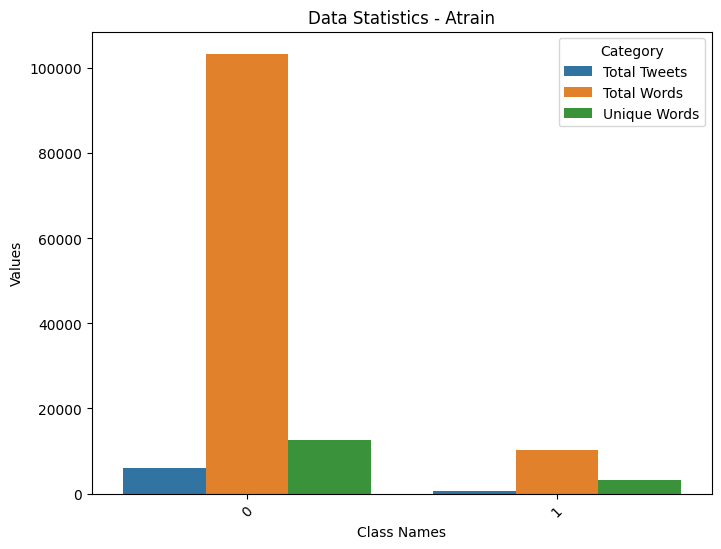

In [ ]:
Atrain_data_matrix = pd.DataFrame({
    'Total Tweets': Atrain_comments,
    'Total Words': Atrain_words,
    'Unique Words': Atrain_u_words,
    'Class Names': Atrain_class_names
})

Atrain_df = pd.melt(Atrain_data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=Atrain_df, x='Class Names', y='Values', hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics - Atrain')

ax.xaxis.set_ticklabels(Atrain_class_names, rotation=45);

plt.show()

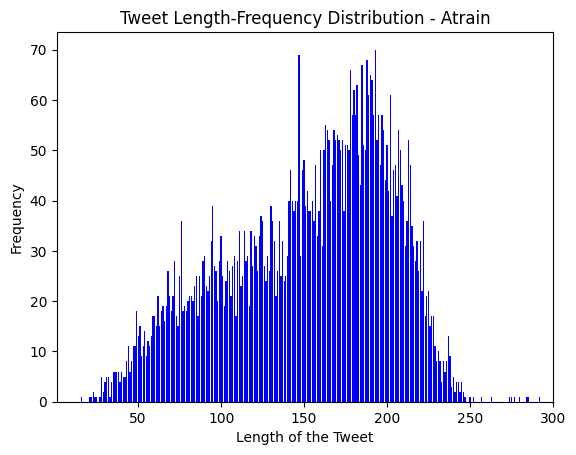

Maximum Length of a Tweet: 831
Minimum Length of a Tweet: 16
Average Length of a Tweet: 155.0


In [ ]:
Atrain['Tweet_length'] = Atrain.cleanText.apply(lambda x: len(x))
frequency = dict()

for i in Atrain.Tweet_length:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlim(1, 300)  # Adjust the xlim based on your data distribution
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Atrain')
plt.show()

print(f"Maximum Length of a Tweet: {max(Atrain.Tweet_length)}")
print(f"Minimum Length of a Tweet: {min(Atrain.Tweet_length)}")
print(f"Average Length of a Tweet: {round(np.mean(Atrain.Tweet_length), 0)}")

In [ ]:
Atrain.loc[Atrain['Tweet_length'] > 200]['label'].value_counts()

0    1058
1      77
Name: label, dtype: int64

In [ ]:

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label = [k for k, v in dataset.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label == label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Documents per class
        tweets.append(len(list(dataset[dataset.label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ", label)
        print("Number of tweets:{}".format(len(list(dataset[dataset.label == label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return tweets, words, u_words, class_label

# Call the function for Aval
Aval_comments, Aval_words, Aval_u_words, Aval_class_names = data_summary(Aval)



Class Name :  0
Number of tweets:1371
Number of Words:23820
Number of Unique Words:5180
Most Frequent Words:

fridaysforfuture	1394
climate	680
climatestrike	395
climatecrisis	299
strike	264
peoplenotprofit	223
week	219
future	206
climateaction	198
change	191

Class Name :  1
Number of tweets:190
Number of Words:2962
Number of Unique Words:970
Most Frequent Words:

fridaysforfuture	190
climatestrike	111
climateaction	110
climatecrisis	110
extinctionrebellion	108
climatechange	107
fool	101
thunberg	101
greta	100
renewable	99
Total Number of Unique Words:5487


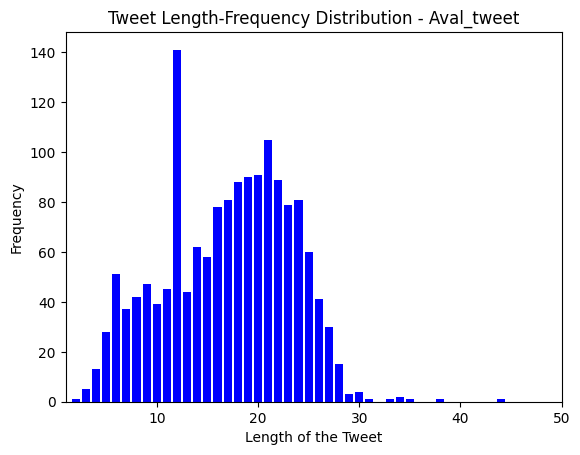

Maximum Length of a Tweet: 86
Minimum Length of a Tweet: 2
Average Length of a Tweet: 17.0


In [ ]:
# Assuming 'cleanText' contains the text in Aval_tweet
Aval['Tweet_length'] = Aval['cleanText'].apply(lambda x: len(x.split()))

frequency = dict()

for i in Aval['Tweet_length']:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlim(1, 50)  # Adjust the xlim based on your data distribution
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Aval_tweet')
plt.show()

print(f"Maximum Length of a Tweet: {max(Aval['Tweet_length'])}")
print(f"Minimum Length of a Tweet: {min(Aval['Tweet_length'])}")
print(f"Average Length of a Tweet: {round(np.mean(Aval['Tweet_length']), 0)}")


In [ ]:
Atest_summary = Atest.filter(['cleanText'])

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]

    # find word list
    word_list = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
        counts[word] = counts.get(word, 0) + 1

    # sort the dictionary of the word list
    ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)

    # Total Word per dataset
    words.append(len(word_list))
    # Unique words per dataset
    u_words.append(len(np.unique(word_list)))

    print("\nDataset Summary")
    print("Total Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Most Frequent Words:\n")
    for k, v in ordered[:10]:
        print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return words, u_words

# Call the function for Atest
Atest_words, Atest_u_words = data_summary(Atest_summary)



Dataset Summary
Total Number of Words:26175
Number of Unique Words:5313
Most Frequent Words:

fridaysforfuture	1583
climate	681
climatestrike	485
climatecrisis	454
climateaction	320
climatechange	266
strike	250
week	244
peoplenotprofit	225
future	203
Total Number of Unique Words:5313


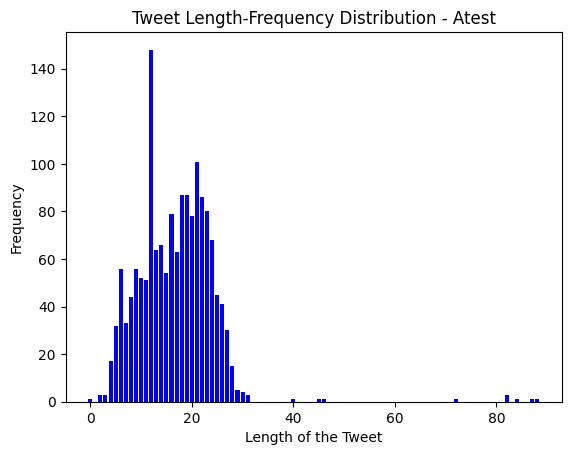

Maximum Length of a Tweet: 88
Minimum Length of a Tweet: 0
Average Length of a Tweet: 17.0


In [ ]:
# Assuming 'cleanText' contains the text in Atest
Atest['Tweet_length'] = Atest['cleanText'].apply(lambda x: len(x.split()))

frequency = dict()

for i in Atest['Tweet_length']:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Atest')
plt.show()

print(f"Maximum Length of a Tweet: {max(Atest['Tweet_length'])}")
print(f"Minimum Length of a Tweet: {min(Atest['Tweet_length'])}")
print(f"Average Length of a Tweet: {round(np.mean(Atest['Tweet_length']), 0)}")


In [ ]:
X_train = Atrain['cleanText'].tolist()
y_train = Atrain['label'].tolist()
X_valid = Aval['cleanText'].tolist()
y_valid = Aval['label'].tolist()
X_test = Atest['cleanText'].tolist()
y_test = Atest['label'].tolist()

In [ ]:
Aval.shape

(1561, 5)

# Compute Class Weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# cls = np.unique(train_data['Label'])
# print(cls)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(Atrain['label']),
                                        y = Atrain['label']
                                    )

weight = {i : class_weights[i] for i in range(2)}
weight

{0: 0.54602474995762, 1: 5.931860036832412}

# Handle Imbalance Class

## Oversampling

In [ ]:
# Class count
count_class_0, count_class_1 = Atrain.label.value_counts()

# Divide by class
df_class_0 = Atrain[Atrain['label'] == 0]
df_class_1 = Atrain[Atrain['label'] == 1]

Random over-sampling:
0    5899
1    5000
Name: label, dtype: int64


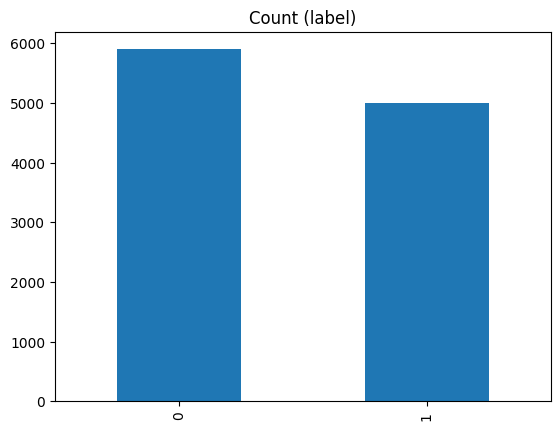

In [ ]:
df_class_1_over = df_class_1.sample(5000, replace=True, random_state = 42)
# df_class_0_down = df_class_0.sample(4000, replace=True)
Atrain_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(Atrain_over.label.value_counts())

Atrain_over.label.value_counts().plot(kind='bar', title='Count (label)');

In [ ]:
X_train_over = Atrain_over['cleanText'].tolist()
y_train_over = Atrain_over['label'].tolist()

## Random Over sampling

Random over-sampling:
0    5899
1    5899
Name: label, dtype: int64


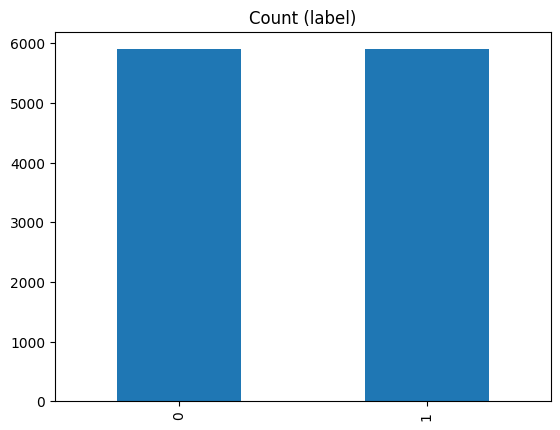

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming Atrain is your original dataframe
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(Atrain[['cleanText']], Atrain['label'])

# Create a new dataframe with the resampled data
Atrain_over = pd.DataFrame({'cleanText': X_ros['cleanText'], 'label': y_ros})

# Check the value counts
print('Random over-sampling:')
print(Atrain_over.label.value_counts())

# Plot the counts
Atrain_over.label.value_counts().plot(kind='bar', title='Count (label)');


# ML Models

## TF-IDF

In [ ]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_over)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(max_depth=3,class_weight='balanced', n_estimators=10)  #use class_weight='balanced'
model_rf.fit(X_train_tfidf, y_train_over)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10)

In [ ]:
y_pred = model_rf.predict(X_val_tfidf)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.91736066623959
Classification Report:
              precision    recall  f1-score   support

           0     0.9417    0.9657    0.9535      1371
           1     0.6968    0.5684    0.6261       190

    accuracy                         0.9174      1561
   macro avg     0.8192    0.7671    0.7898      1561
weighted avg     0.9119    0.9174    0.9137      1561



In [ ]:
y_pred = model_rf.predict(X_test_tfidf)
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr)

Logistic Regression Accuracy: 0.9199743918053778
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9470    0.9629    0.9549      1374
           1     0.6909    0.6064    0.6459       188

    accuracy                         0.9200      1562
   macro avg     0.8190    0.7846    0.8004      1562
weighted avg     0.9162    0.9200    0.9177      1562



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression(class_weight = 'balanced', solver='liblinear', C=1)
model_lr.fit(X_train_tfidf, y_train_over)

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [ ]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_val_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
classification_report_lr = classification_report(y_valid, y_pred_lr, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr)

Logistic Regression Accuracy: 0.9276105060858424
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9838    0.9329    0.9577      1371
           1     0.6475    0.8895    0.7494       190

    accuracy                         0.9276      1561
   macro avg     0.8157    0.9112    0.8536      1561
weighted avg     0.9429    0.9276    0.9323      1561



In [ ]:
y_pred = model_lr.predict(X_test_tfidf)
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr)

Logistic Regression Accuracy: 0.9302176696542894
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9817    0.9381    0.9594      1374
           1     0.6586    0.8723    0.7506       188

    accuracy                         0.9302      1562
   macro avg     0.8202    0.9052    0.8550      1562
weighted avg     0.9428    0.9302    0.9343      1562



In [ ]:
'''import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Atest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/kaggle/working/submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")'''

### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Multinomial Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred_nb = model_nb.predict(X_val_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_valid, y_pred_nb)
classification_report_nb = classification_report(y_valid, y_pred_nb, digits = 4)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print('Classification Report for Multinomial Naive Bayes:\n', classification_report_nb)


Multinomial Naive Bayes Accuracy: 0.9180012812299808
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0     0.9822    0.9234    0.9519      1371
           1     0.6140    0.8789    0.7229       190

    accuracy                         0.9180      1561
   macro avg     0.7981    0.9012    0.8374      1561
weighted avg     0.9373    0.9180    0.9240      1561



In [ ]:
y_pred = model_nb.predict(X_test_tfidf)
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr)

Logistic Regression Accuracy: 0.9186939820742638
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9830    0.9236    0.9523      1374
           1     0.6125    0.8830    0.7233       188

    accuracy                         0.9187      1562
   macro avg     0.7978    0.9033    0.8378      1562
weighted avg     0.9384    0.9187    0.9248      1562



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred = model_svm.predict(X_val_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_valid, y_pred)
classification_report_svm = classification_report(y_valid, y_pred, digits = 4)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm) # 0.65      0.65      0.65

SVM Accuracy: 0.948750800768738
Classification Report for SVM:
               precision    recall  f1-score   support

           0     0.9785    0.9628    0.9706      1371
           1     0.7594    0.8474    0.8010       190

    accuracy                         0.9488      1561
   macro avg     0.8690    0.9051    0.8858      1561
weighted avg     0.9518    0.9488    0.9499      1561



In [ ]:
y_pred = model_svm.predict(X_test_tfidf)
#y_pred = model_lr.predict(X_test_tfidf)
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr)

Logistic Regression Accuracy: 0.9558258642765685
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9801    0.9694    0.9748      1374
           1     0.7931    0.8564    0.8235       188

    accuracy                         0.9558      1562
   macro avg     0.8866    0.9129    0.8991      1562
weighted avg     0.9576    0.9558    0.9566      1562



In [ ]:
#y_pred = model_svm.predict(X_test_tfidf)

'''import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Atest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/kaggle/working/submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")'''

## Word2Vec(spacy)

In [ ]:
!python -m spacy download en_core_web_md

2024-01-15 13:46:36.464288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 13:46:36.464369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 13:46:36.467075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 13:46:38.205648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Tokenize and extract word vectors using spaCy
def spacy_word_vectors(text):
    doc = nlp(text)
    return doc.vector

# Apply spaCy word vectors extraction to the training set
X_train_spacy = [spacy_word_vectors(text) for text in X_train_over]

# Apply spaCy word vectors extraction to the validation set
X_valid_spacy = [spacy_word_vectors(text) for text in X_valid]

# Apply spaCy word vectors extraction to the test set
X_test_spacy = [spacy_word_vectors(text) for text in X_test]

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(max_depth=10, class_weight='balanced', n_estimators=10)  #use class_weight='balanced'
model_rf.fit(X_train_spacy, y_train_over)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10)

In [ ]:
y_pred = model_rf.predict(X_valid_spacy)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9397821909032671
Classification Report:
              precision    recall  f1-score   support

           0     0.9761    0.9548    0.9653      1371
           1     0.7182    0.8316    0.7707       190

    accuracy                         0.9398      1561
   macro avg     0.8472    0.8932    0.8680      1561
weighted avg     0.9447    0.9398    0.9417      1561



In [ ]:
y_pred = model_rf.predict(X_test_spacy)
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr)

Logistic Regression Accuracy: 0.9481434058898848
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9778    0.9629    0.9703      1374
           1     0.7560    0.8404    0.7960       188

    accuracy                         0.9481      1562
   macro avg     0.8669    0.9017    0.8831      1562
weighted avg     0.9511    0.9481    0.9493      1562



### SVM

In [ ]:
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_spacy, y_train_over)

# Predict on the validation set
y_pred_valid = model_svm.predict(X_valid_spacy)

# Predict on the test set
y_pred_test = model_svm.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_svm_valid = accuracy_score(y_test, y_pred_test)
classification_report_svm_valid = classification_report(y_test, y_pred_test, digits = 4)

print(f'SVM Accuracy on Validation Set: {accuracy_svm_valid}')
print('Classification Report for SVM on Validation Set:\n', classification_report_svm_valid)

SVM Accuracy on Validation Set: 0.8316261203585147
Classification Report for SVM on Validation Set:
               precision    recall  f1-score   support

           0     0.9818    0.8239    0.8959      1374
           1     0.4083    0.8883    0.5595       188

    accuracy                         0.8316      1562
   macro avg     0.6950    0.8561    0.7277      1562
weighted avg     0.9128    0.8316    0.8554      1562



### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_spacy)
scaled_val_embed = scaler.transform(X_valid_spacy)
scaled_test_embed = scaler.transform(X_test_spacy)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes (MNB)
model_mnb = MultinomialNB()
model_mnb.fit(scaled_train_embed, y_train_over)

# Predict on the validation set
y_pred_valid_mnb = model_mnb.predict(scaled_val_embed)

# Predict on the test set
y_pred_test_mnb = model_mnb.predict(scaled_test_embed)

# Evaluation on the validation set
accuracy_mnb_valid = accuracy_score(y_test, y_pred_test_mnb)
classification_report_mnb_valid = classification_report(y_test, y_pred_test_mnb, digits = 4)

print(f'MNB Accuracy on Validation Set: {accuracy_mnb_valid}')
print('Classification Report for MNB on Validation Set:\n', classification_report_mnb_valid)

# You can use y_pred_test_mnb for predictions on the test set


MNB Accuracy on Validation Set: 0.8405889884763125
Classification Report for MNB on Validation Set:
               precision    recall  f1-score   support

           0     0.9584    0.8559    0.9043      1374
           1     0.4090    0.7287    0.5239       188

    accuracy                         0.8406      1562
   macro avg     0.6837    0.7923    0.7141      1562
weighted avg     0.8923    0.8406    0.8585      1562



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression (LR)
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_spacy, y_train_over)

# Predict on the validation set
y_pred_valid_lr = model_lr.predict(X_valid_spacy)

# Predict on the test set
y_pred_test_lr = model_lr.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_lr_valid = accuracy_score(y_test, y_pred_test_lr)
classification_report_lr_valid = classification_report(y_test, y_pred_test_lr, digits = 4)

print(f'LR Accuracy on Validation Set: {accuracy_lr_valid}')
print('Classification Report for LR on Validation Set:\n', classification_report_lr_valid)

# You can use y_pred_test_lr for predictions on the test set

LR Accuracy on Validation Set: 0.8316261203585147
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           0     0.9801    0.8253    0.8961      1374
           1     0.4074    0.8777    0.5565       188

    accuracy                         0.8316      1562
   macro avg     0.6938    0.8515    0.7263      1562
weighted avg     0.9112    0.8316    0.8552      1562



# Deep Learning


## Glove BiGRU


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input



In [ ]:
tokenizer = Tokenizer(num_words = 116000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(Atrain_over['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Load GloVe embeddings
glove_file = '/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/glove.twitter.27B.100d.pkl'  # Specify the path to your GloVe file
word2vec_output_file = '/content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/glove.twitter.27B.100d.word2vec'
#glove2word2vec(glove_file, word2vec_output_file)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [ ]:
# Create an embedding matrix
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Assuming GloVe embeddings are 300-dimensional
for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [ ]:
print(vocab_size)

13377


In [ ]:
max_len = 800
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train_over)
print(len(tokenizer.word_index))
train_pad_sequences =  pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

# Validation Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of test Sequences :" ,test_pad_sequences.shape)

13376
Number of Training Sequences : (10899, 800)
Number of Validation Sequences : (1561, 800)
Number of test Sequences : (1562, 800)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "BiGRU_tf.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(GRU(units = 256,return_sequences=True,dropout = 0.2)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 300)          4013100   
                                                                 
 bidirectional (Bidirection  (None, 800, 512)          857088    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 409600)            0         
                                                                 
 dense (Dense)               (None, 1)                 409601    
                                                                 
Total params: 5279789 (20.14 MB)
Trainable params: 5279789 (20.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list,
    class_weight = weight
)
 # as here weight is not using

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 1.0011 - accuracy: 0.4588
Epoch 1: val_accuracy improved from -inf to 0.12172, saving model to /content/drive/MyDrive/Colab Notebooks/CASE@EACL2024/BiGRU_tf.h5
341/341 [==============================] - 81s 203ms/step - loss: 1.0011 - accuracy: 0.4588 - val_loss: 2.0557 - val_accuracy: 0.1217
Epoch 2/15
341/341 [==============================] - ETA: 0s - loss: 0.9636 - accuracy: 0.4588
Epoch 2: val_accuracy did not improve from 0.12172
341/341 [==============================] - 41s 120ms/step - loss: 0.9636 - accuracy: 0.4588 - val_loss: 2.1412 - val_accuracy: 0.1217
Epoch 3/15
341/341 [==============================] - ETA: 0s - loss: 0.9554 - accuracy: 0.4588
Epoch 3: val_accuracy did not improve from 0.12172
341/341 [==============================] - 51s 150ms/step - loss: 0.9554 - accuracy: 0.4588 - val_loss: 1.9378 - val_accuracy: 0.1217
Epoch 4/15
341/341 [==============================] - ETA: 0s - loss: 0.93

In [ ]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = model.predict(validation_pad_sequences) #np.argmax(model.predict(validation_pad_sequences), axis=-1)
y_pred = np.where(y_pred>.50,1,0)

print("F1-Score:",f1_score(y_valid,y_pred,average='macro')*100)
print("Accuracy:",accuracy_score(y_valid,y_pred)*100)

49/49 [==============================] - 3s 40ms/step
F1-Score: 80.48620691732584
Accuracy: 89.36579115951314


In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(y_valid, y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      1371
           1       0.54      0.90      0.67       190

    accuracy                           0.89      1561
   macro avg       0.76      0.90      0.80      1561
weighted avg       0.93      0.89      0.90      1561



## Glove BiLSTM + CNN

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

num_classes = 2            #### change class number
max_len = 800

accuracy_threshold = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "glovebilstmcnn.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_recall', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          100       
                                                                 
 bidirectional (Bidirection  (None, 800, 128)          84480     
 al)                                                             
                                                                 
 conv1d (Conv1D)             (None, 798, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 266, 64)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17024)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 33s 72ms/step - loss: 0.6929 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6879 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/15
340/341 [============================>.] - ETA: 0s - loss: 0.6924 - accuracy: 0.5415 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 53ms/step - loss: 0.6924 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6831 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/15
341/341 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 19s 56ms/step - loss: 0.6919 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/15
341/341 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 52ms/step - loss: 0.6916 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6748 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/15
341/341 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 52ms/step - loss: 0.6913 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6713 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 6/15
340/341 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5413 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 17s 51ms/step - loss: 0.6910 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6677 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 7/15
340/341 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 17s 50ms/step - loss: 0.6908 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6647 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 8/15
341/341 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 51ms/step - loss: 0.6906 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6621 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 9/15
341/341 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 53ms/step - loss: 0.6905 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6595 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 10/15
341/341 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 17s 50ms/step - loss: 0.6904 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6572 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 11/15
341/341 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 27s 79ms/step - loss: 0.6903 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6552 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 12/15
341/341 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 24s 69ms/step - loss: 0.6902 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6531 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 13/15
341/341 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 51ms/step - loss: 0.6901 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6513 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 14/15
341/341 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 18s 52ms/step - loss: 0.6900 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6497 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 15/15
340/341 [============================>.] - ETA: 0s - loss: 0.6900 - accuracy: 0.5414 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

341/341 [==============================] - 17s 51ms/step - loss: 0.6900 - accuracy: 0.5412 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6483 - val_accuracy: 0.8783 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00


In [ ]:
from sklearn.metrics import classification_report

# Load the model
#loaded_model = load_model("glovebilstmcnn.h5")

# Evaluate the model on the validation set
y_pred = model.predict(test_pad_sequences)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust threshold if needed

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['label'], y_pred_binary, digits = 4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 3s 31ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8796    1.0000    0.9360      1374
           1     0.0000    0.0000    0.0000       188

    accuracy                         0.8796      1562
   macro avg     0.4398    0.5000    0.4680      1562
weighted avg     0.7738    0.8796    0.8233      1562



## Glove BiLSTM

In [ ]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99
max_len = 800
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "glovebilstm.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_recall_8', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 800, 100)          100       
                                                                 
 bidirectional_1 (Bidirecti  (None, 800, 128)          84480     
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 102400)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               13107328  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 32s 74ms/step - loss: 0.6929 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6879 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/15
341/341 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 33s 96ms/step - loss: 0.6924 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6831 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/15
341/341 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 53ms/step - loss: 0.6919 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/15
341/341 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 19s 54ms/step - loss: 0.6916 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6748 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/15
341/341 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 19s 54ms/step - loss: 0.6913 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6713 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 6/15
341/341 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 53ms/step - loss: 0.6910 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6677 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 7/15
341/341 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 19s 55ms/step - loss: 0.6908 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6647 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 8/15
341/341 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 54ms/step - loss: 0.6906 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6621 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 9/15
341/341 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 52ms/step - loss: 0.6905 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6595 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 10/15
340/341 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.5415 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 52ms/step - loss: 0.6904 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6572 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 11/15
341/341 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 19s 56ms/step - loss: 0.6903 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6552 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 12/15
341/341 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 54ms/step - loss: 0.6902 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6531 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 13/15
340/341 [============================>.] - ETA: 0s - loss: 0.6901 - accuracy: 0.5413 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 19s 55ms/step - loss: 0.6901 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6513 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 14/15
341/341 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 53ms/step - loss: 0.6900 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6497 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 15/15
341/341 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

341/341 [==============================] - 18s 53ms/step - loss: 0.6900 - accuracy: 0.5412 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.6483 - val_accuracy: 0.8783 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00


In [ ]:
from sklearn.metrics import classification_report

# Load the model
#loaded_model = load_model("glovebilstm.h5")

# Evaluate the model on the validation set
y_pred = model.predict(test_pad_sequences)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust threshold if needed

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['label'], y_pred_binary, digits = 4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 2s 27ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8796    1.0000    0.9360      1374
           1     0.0000    0.0000    0.0000       188

    accuracy                         0.8796      1562
   macro avg     0.4398    0.5000    0.4680      1562
weighted avg     0.7738    0.8796    0.8233      1562



## Glove CNN + BiGRU

In [ ]:
from tensorflow.keras.models import Model

num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "glovebigrucnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_recall_12', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 800)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 800, 100)          100       
                                                                 
 conv1d_1 (Conv1D)           (None, 796, 128)          64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 159, 128)          0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 159, 128)          74496     
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 20352)             0     

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 26s 37ms/step - loss: 0.6929 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6879 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/15
341/341 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 9s 26ms/step - loss: 0.6924 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6831 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/15
340/341 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5413 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 7s 21ms/step - loss: 0.6919 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/15
338/341 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5418 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 17ms/step - loss: 0.6916 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6748 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 5/15
338/341 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5407 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 7s 19ms/step - loss: 0.6913 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6713 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 6/15
341/341 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 17ms/step - loss: 0.6910 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6677 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 7/15
341/341 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 19ms/step - loss: 0.6908 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6647 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 8/15
341/341 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 18ms/step - loss: 0.6906 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6621 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 9/15
341/341 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 17ms/step - loss: 0.6905 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6595 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 10/15
338/341 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.5416 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 7s 20ms/step - loss: 0.6904 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6572 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 11/15
339/341 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 17ms/step - loss: 0.6903 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6552 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 12/15
340/341 [============================>.] - ETA: 0s - loss: 0.6902 - accuracy: 0.5413 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 7s 20ms/step - loss: 0.6902 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6531 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 13/15
341/341 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 5s 16ms/step - loss: 0.6901 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6513 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 14/15
341/341 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 18ms/step - loss: 0.6900 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6497 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 15/15
338/341 [============================>.] - ETA: 0s - loss: 0.6900 - accuracy: 0.5409 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

341/341 [==============================] - 6s 18ms/step - loss: 0.6900 - accuracy: 0.5412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6483 - val_accuracy: 0.8783 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00


In [ ]:
from sklearn.metrics import classification_report

# Load the model
#loaded_model = load_model("glovebigrucnn.h5")

# Evaluate the model on the validation set
y_pred = model.predict(test_pad_sequences)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust threshold if needed

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['label'], y_pred_binary, digits = 4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 1s 11ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8796    1.0000    0.9360      1374
           1     0.0000    0.0000    0.0000       188

    accuracy                         0.8796      1562
   macro avg     0.4398    0.5000    0.4680      1562
weighted avg     0.7738    0.8796    0.8233      1562



## FastText CNN + BiLSTM

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrixx = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrixx[i] = embedding_vector

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "fasttext_CNNBiLSTMModel.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_recall_18', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 2, activation='relu'),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Bidirectional(LSTM(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 800, 300)          4013100   
                                                                 
 conv1d_2 (Conv1D)           (None, 799, 128)          76928     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 266, 128)          0         
 g1D)                                                            
                                                                 
 bidirectional_3 (Bidirecti  (None, 266, 512)          788480    
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 136192)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 0.6210 - accuracy: 0.6360 - precision_4: 0.6909 - recall_4: 0.3738

341/341 [==============================] - 32s 57ms/step - loss: 0.6210 - accuracy: 0.6360 - precision_4: 0.6909 - recall_4: 0.3738 - val_loss: 0.3602 - val_accuracy: 0.8732 - val_precision_4: 0.4858 - val_recall_4: 0.7211
Epoch 2/15
340/341 [============================>.] - ETA: 0s - loss: 0.4572 - accuracy: 0.7926 - precision_4: 0.7709 - recall_4: 0.7795

341/341 [==============================] - 15s 44ms/step - loss: 0.4573 - accuracy: 0.7926 - precision_4: 0.7711 - recall_4: 0.7794 - val_loss: 0.2769 - val_accuracy: 0.8981 - val_precision_4: 0.5608 - val_recall_4: 0.7526
Epoch 3/15
341/341 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.8458 - precision_4: 0.8213 - recall_4: 0.8484

341/341 [==============================] - 13s 37ms/step - loss: 0.3670 - accuracy: 0.8458 - precision_4: 0.8213 - recall_4: 0.8484 - val_loss: 0.4427 - val_accuracy: 0.7982 - val_precision_4: 0.3656 - val_recall_4: 0.8947
Epoch 4/15
341/341 [==============================] - ETA: 0s - loss: 0.2854 - accuracy: 0.8844 - precision_4: 0.8632 - recall_4: 0.8888

341/341 [==============================] - 13s 37ms/step - loss: 0.2854 - accuracy: 0.8844 - precision_4: 0.8632 - recall_4: 0.8888 - val_loss: 0.3230 - val_accuracy: 0.8623 - val_precision_4: 0.4648 - val_recall_4: 0.8684
Epoch 5/15
341/341 [==============================] - ETA: 0s - loss: 0.2180 - accuracy: 0.9155 - precision_4: 0.8950 - recall_4: 0.9242

341/341 [==============================] - 12s 35ms/step - loss: 0.2180 - accuracy: 0.9155 - precision_4: 0.8950 - recall_4: 0.9242 - val_loss: 0.2862 - val_accuracy: 0.8924 - val_precision_4: 0.5367 - val_recall_4: 0.8474
Epoch 6/15
341/341 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9273 - precision_4: 0.9082 - recall_4: 0.9362

341/341 [==============================] - 12s 36ms/step - loss: 0.1870 - accuracy: 0.9273 - precision_4: 0.9082 - recall_4: 0.9362 - val_loss: 0.2719 - val_accuracy: 0.9122 - val_precision_4: 0.5985 - val_recall_4: 0.8474
Epoch 7/15
341/341 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9445 - precision_4: 0.9256 - recall_4: 0.9558

341/341 [==============================] - 12s 36ms/step - loss: 0.1504 - accuracy: 0.9445 - precision_4: 0.9256 - recall_4: 0.9558 - val_loss: 0.2783 - val_accuracy: 0.9385 - val_precision_4: 0.7136 - val_recall_4: 0.8263
Epoch 8/15
341/341 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9494 - precision_4: 0.9359 - recall_4: 0.9550

341/341 [==============================] - 13s 38ms/step - loss: 0.1379 - accuracy: 0.9494 - precision_4: 0.9359 - recall_4: 0.9550 - val_loss: 0.2579 - val_accuracy: 0.9263 - val_precision_4: 0.6518 - val_recall_4: 0.8474
Epoch 9/15
340/341 [============================>.] - ETA: 0s - loss: 0.1162 - accuracy: 0.9605 - precision_4: 0.9466 - recall_4: 0.9685

341/341 [==============================] - 13s 38ms/step - loss: 0.1162 - accuracy: 0.9604 - precision_4: 0.9463 - recall_4: 0.9686 - val_loss: 0.3335 - val_accuracy: 0.8981 - val_precision_4: 0.5529 - val_recall_4: 0.8526
Epoch 10/15
341/341 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9639 - precision_4: 0.9519 - recall_4: 0.9704

341/341 [==============================] - 13s 38ms/step - loss: 0.0994 - accuracy: 0.9639 - precision_4: 0.9519 - recall_4: 0.9704 - val_loss: 0.3497 - val_accuracy: 0.8943 - val_precision_4: 0.5413 - val_recall_4: 0.8632
Epoch 11/15
341/341 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9702 - precision_4: 0.9593 - recall_4: 0.9764

341/341 [==============================] - 13s 38ms/step - loss: 0.0816 - accuracy: 0.9702 - precision_4: 0.9593 - recall_4: 0.9764 - val_loss: 0.3280 - val_accuracy: 0.9026 - val_precision_4: 0.5674 - val_recall_4: 0.8421
Epoch 12/15
341/341 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9705 - precision_4: 0.9610 - recall_4: 0.9754

341/341 [==============================] - 13s 38ms/step - loss: 0.0836 - accuracy: 0.9705 - precision_4: 0.9610 - recall_4: 0.9754 - val_loss: 0.4519 - val_accuracy: 0.8687 - val_precision_4: 0.4779 - val_recall_4: 0.8526
Epoch 13/15
341/341 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9750 - precision_4: 0.9666 - recall_4: 0.9794

341/341 [==============================] - 13s 38ms/step - loss: 0.0725 - accuracy: 0.9750 - precision_4: 0.9666 - recall_4: 0.9794 - val_loss: 0.3047 - val_accuracy: 0.9443 - val_precision_4: 0.7512 - val_recall_4: 0.8105
Epoch 14/15
341/341 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9748 - precision_4: 0.9666 - recall_4: 0.9788

341/341 [==============================] - 13s 38ms/step - loss: 0.0720 - accuracy: 0.9748 - precision_4: 0.9666 - recall_4: 0.9788 - val_loss: 0.2709 - val_accuracy: 0.9385 - val_precision_4: 0.7196 - val_recall_4: 0.8105
Epoch 15/15
341/341 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9701 - precision_4: 0.9613 - recall_4: 0.9740

341/341 [==============================] - 13s 38ms/step - loss: 0.0853 - accuracy: 0.9701 - precision_4: 0.9613 - recall_4: 0.9740 - val_loss: 0.3210 - val_accuracy: 0.9206 - val_precision_4: 0.6289 - val_recall_4: 0.8474


In [ ]:
from sklearn.metrics import classification_report

# Load the model
#loaded_model = load_model("fasttext_CNNBiLSTMModel.h5")

# Evaluate the model on the validation set
y_pred = model.predict(test_pad_sequences)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust threshold if needed

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['label'], y_pred_binary, digits = 4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 2s 17ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9773    0.9410    0.9588      1374
           1     0.6611    0.8404    0.7400       188

    accuracy                         0.9289      1562
   macro avg     0.8192    0.8907    0.8494      1562
weighted avg     0.9393    0.9289    0.9325      1562



## Fasttext CNN + BiGRU

In [ ]:

num_classes = 2

accuracy_threshold = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "fasttext_CNNBiGRU.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_recall_19', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrixx], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 800)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 800, 300)          4013100   
                                                                 
 conv1d_3 (Conv1D)           (None, 796, 128)          192128    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 159, 128)          0         
 g1D)                                                            
                                                                 
 bidirectional_4 (Bidirecti  (None, 159, 128)          74496     
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 20352)             0   

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 0.6429 - accuracy: 0.6189 - precision_5: 0.6966 - recall_5: 0.2998

341/341 [==============================] - 23s 43ms/step - loss: 0.6429 - accuracy: 0.6189 - precision_5: 0.6966 - recall_5: 0.2998 - val_loss: 0.3209 - val_accuracy: 0.8937 - val_precision_5: 0.5484 - val_recall_5: 0.7158
Epoch 2/15
341/341 [==============================] - ETA: 0s - loss: 0.3514 - accuracy: 0.8576 - precision_5: 0.8408 - recall_5: 0.8506

341/341 [==============================] - 10s 29ms/step - loss: 0.3514 - accuracy: 0.8576 - precision_5: 0.8408 - recall_5: 0.8506 - val_loss: 0.2167 - val_accuracy: 0.9257 - val_precision_5: 0.6595 - val_recall_5: 0.8053
Epoch 3/15
340/341 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9382 - precision_5: 0.9287 - recall_5: 0.9373

341/341 [==============================] - 9s 26ms/step - loss: 0.1790 - accuracy: 0.9383 - precision_5: 0.9289 - recall_5: 0.9374 - val_loss: 0.2878 - val_accuracy: 0.8937 - val_precision_5: 0.5397 - val_recall_5: 0.8579
Epoch 4/15
341/341 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9674 - precision_5: 0.9593 - recall_5: 0.9702

341/341 [==============================] - 11s 32ms/step - loss: 0.1043 - accuracy: 0.9674 - precision_5: 0.9593 - recall_5: 0.9702 - val_loss: 0.2318 - val_accuracy: 0.9379 - val_precision_5: 0.7067 - val_recall_5: 0.8368
Epoch 5/15
340/341 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9764 - precision_5: 0.9706 - recall_5: 0.9782

341/341 [==============================] - 8s 24ms/step - loss: 0.0767 - accuracy: 0.9764 - precision_5: 0.9706 - recall_5: 0.9782 - val_loss: 0.2504 - val_accuracy: 0.9488 - val_precision_5: 0.7778 - val_recall_5: 0.8105
Epoch 6/15
339/341 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9815 - precision_5: 0.9776 - recall_5: 0.9821

341/341 [==============================] - 7s 20ms/step - loss: 0.0609 - accuracy: 0.9816 - precision_5: 0.9777 - recall_5: 0.9822 - val_loss: 0.2303 - val_accuracy: 0.9507 - val_precision_5: 0.7839 - val_recall_5: 0.8211
Epoch 7/15
340/341 [============================>.] - ETA: 0s - loss: 0.0433 - accuracy: 0.9875 - precision_5: 0.9848 - recall_5: 0.9880

341/341 [==============================] - 7s 22ms/step - loss: 0.0433 - accuracy: 0.9875 - precision_5: 0.9848 - recall_5: 0.9880 - val_loss: 0.2934 - val_accuracy: 0.9417 - val_precision_5: 0.7281 - val_recall_5: 0.8316
Epoch 8/15
341/341 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9872 - precision_5: 0.9829 - recall_5: 0.9894

341/341 [==============================] - 7s 20ms/step - loss: 0.0468 - accuracy: 0.9872 - precision_5: 0.9829 - recall_5: 0.9894 - val_loss: 0.2461 - val_accuracy: 0.9571 - val_precision_5: 0.8361 - val_recall_5: 0.8053
Epoch 9/15
340/341 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9899 - precision_5: 0.9866 - recall_5: 0.9914

341/341 [==============================] - 7s 21ms/step - loss: 0.0389 - accuracy: 0.9898 - precision_5: 0.9865 - recall_5: 0.9914 - val_loss: 0.2337 - val_accuracy: 0.9552 - val_precision_5: 0.8191 - val_recall_5: 0.8105
Epoch 10/15
341/341 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9922 - precision_5: 0.9896 - recall_5: 0.9934


Reached 99.00% accuracy so we will stop trianing
341/341 [==============================] - 7s 20ms/step - loss: 0.0327 - accuracy: 0.9922 - precision_5: 0.9896 - recall_5: 0.9934 - val_loss: 0.2860 - val_accuracy: 0.9385 - val_precision_5: 0.7217 - val_recall_5: 0.8053


In [ ]:
from sklearn.metrics import classification_report

# Load the model
#loaded_model = load_model("fasttext_CNNBiGRU.h5")

# Evaluate the model on the validation set
y_pred = model.predict(test_pad_sequences)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust threshold if needed

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['label'], y_pred_binary, digits = 4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 1s 13ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9795    0.9731    0.9763      1374
           1     0.8122    0.8511    0.8312       188

    accuracy                         0.9584      1562
   macro avg     0.8958    0.9121    0.9037      1562
weighted avg     0.9594    0.9584    0.9588      1562



## FastText BiGRU

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "fasttext_BiGRUModel_FastText.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_recall_20', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(GRU(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 800, 300)          4013100   
                                                                 
 bidirectional_5 (Bidirecti  (None, 800, 512)          857088    
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 409600)            0         
                                                                 
 dense_11 (Dense)            (None, 1)                 409601    
                                                                 
Total params: 5279789 (20.14 MB)
Trainable params: 1266689 (4.83 MB)
Non-trainable params: 4013100 (15.31 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

history = model.fit(
    train_pad_sequences,
    Atrain_over['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
341/341 [==============================] - ETA: 0s - loss: 0.6201 - accuracy: 0.6498 - precision_6: 0.7104 - recall_6: 0.3994

341/341 [==============================] - 45s 108ms/step - loss: 0.6201 - accuracy: 0.6498 - precision_6: 0.7104 - recall_6: 0.3994 - val_loss: 0.3707 - val_accuracy: 0.8693 - val_precision_6: 0.4750 - val_recall_6: 0.7000
Epoch 2/15
341/341 [==============================] - ETA: 0s - loss: 0.5017 - accuracy: 0.7569 - precision_6: 0.7368 - recall_6: 0.7312

341/341 [==============================] - 32s 94ms/step - loss: 0.5017 - accuracy: 0.7569 - precision_6: 0.7368 - recall_6: 0.7312 - val_loss: 0.3908 - val_accuracy: 0.8463 - val_precision_6: 0.4265 - val_recall_6: 0.7632
Epoch 3/15
341/341 [==============================] - ETA: 0s - loss: 0.4578 - accuracy: 0.7864 - precision_6: 0.7670 - recall_6: 0.7676

341/341 [==============================] - 33s 98ms/step - loss: 0.4578 - accuracy: 0.7864 - precision_6: 0.7670 - recall_6: 0.7676 - val_loss: 0.4954 - val_accuracy: 0.7566 - val_precision_6: 0.3201 - val_recall_6: 0.8895
Epoch 4/15
341/341 [==============================] - ETA: 0s - loss: 0.4236 - accuracy: 0.8099 - precision_6: 0.7865 - recall_6: 0.8038

341/341 [==============================] - 32s 95ms/step - loss: 0.4236 - accuracy: 0.8099 - precision_6: 0.7865 - recall_6: 0.8038 - val_loss: 0.3953 - val_accuracy: 0.8277 - val_precision_6: 0.4010 - val_recall_6: 0.8421
Epoch 5/15
341/341 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8304 - precision_6: 0.8048 - recall_6: 0.8320

341/341 [==============================] - 32s 93ms/step - loss: 0.3912 - accuracy: 0.8304 - precision_6: 0.8048 - recall_6: 0.8320 - val_loss: 0.3342 - val_accuracy: 0.8520 - val_precision_6: 0.4373 - val_recall_6: 0.7526
Epoch 6/15
341/341 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.8328 - precision_6: 0.8101 - recall_6: 0.8302

341/341 [==============================] - 32s 95ms/step - loss: 0.3824 - accuracy: 0.8328 - precision_6: 0.8101 - recall_6: 0.8302 - val_loss: 0.4778 - val_accuracy: 0.7880 - val_precision_6: 0.3503 - val_recall_6: 0.8684
Epoch 7/15
341/341 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.8392 - precision_6: 0.8160 - recall_6: 0.8384

341/341 [==============================] - 33s 97ms/step - loss: 0.3634 - accuracy: 0.8392 - precision_6: 0.8160 - recall_6: 0.8384 - val_loss: 0.3638 - val_accuracy: 0.8475 - val_precision_6: 0.4344 - val_recall_6: 0.8368
Epoch 8/15
341/341 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8438 - precision_6: 0.8199 - recall_6: 0.8452

341/341 [==============================] - 32s 93ms/step - loss: 0.3497 - accuracy: 0.8438 - precision_6: 0.8199 - recall_6: 0.8452 - val_loss: 0.3622 - val_accuracy: 0.8437 - val_precision_6: 0.4286 - val_recall_6: 0.8526
Epoch 9/15
341/341 [==============================] - ETA: 0s - loss: 0.3261 - accuracy: 0.8635 - precision_6: 0.8402 - recall_6: 0.8674

341/341 [==============================] - 32s 95ms/step - loss: 0.3261 - accuracy: 0.8635 - precision_6: 0.8402 - recall_6: 0.8674 - val_loss: 0.4453 - val_accuracy: 0.7995 - val_precision_6: 0.3642 - val_recall_6: 0.8684
Epoch 10/15
341/341 [==============================] - ETA: 0s - loss: 0.3175 - accuracy: 0.8659 - precision_6: 0.8422 - recall_6: 0.8708

341/341 [==============================] - 32s 93ms/step - loss: 0.3175 - accuracy: 0.8659 - precision_6: 0.8422 - recall_6: 0.8708 - val_loss: 0.3769 - val_accuracy: 0.8443 - val_precision_6: 0.4301 - val_recall_6: 0.8579
Epoch 11/15
341/341 [==============================] - ETA: 0s - loss: 1.2530 - accuracy: 0.7352 - precision_6: 0.7101 - recall_6: 0.7144

341/341 [==============================] - 32s 95ms/step - loss: 1.2530 - accuracy: 0.7352 - precision_6: 0.7101 - recall_6: 0.7144 - val_loss: 0.3359 - val_accuracy: 0.8527 - val_precision_6: 0.4398 - val_recall_6: 0.7684
Epoch 12/15
341/341 [==============================] - ETA: 0s - loss: 0.5361 - accuracy: 0.7603 - precision_6: 0.7348 - recall_6: 0.7474

341/341 [==============================] - 33s 95ms/step - loss: 0.5361 - accuracy: 0.7603 - precision_6: 0.7348 - recall_6: 0.7474 - val_loss: 0.2567 - val_accuracy: 0.9103 - val_precision_6: 0.6289 - val_recall_6: 0.6421
Epoch 13/15
341/341 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.7858 - precision_6: 0.7602 - recall_6: 0.7786

341/341 [==============================] - 32s 93ms/step - loss: 0.4732 - accuracy: 0.7858 - precision_6: 0.7602 - recall_6: 0.7786 - val_loss: 1.1611 - val_accuracy: 0.4824 - val_precision_6: 0.1840 - val_recall_6: 0.9474
Epoch 14/15
341/341 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.7859 - precision_6: 0.7596 - recall_6: 0.7800

341/341 [==============================] - 33s 95ms/step - loss: 0.4681 - accuracy: 0.7859 - precision_6: 0.7596 - recall_6: 0.7800 - val_loss: 0.3201 - val_accuracy: 0.8591 - val_precision_6: 0.4548 - val_recall_6: 0.7947
Epoch 15/15
341/341 [==============================] - ETA: 0s - loss: 0.4558 - accuracy: 0.7973 - precision_6: 0.7721 - recall_6: 0.7920

341/341 [==============================] - 33s 96ms/step - loss: 0.4558 - accuracy: 0.7973 - precision_6: 0.7721 - recall_6: 0.7920 - val_loss: 0.3965 - val_accuracy: 0.8155 - val_precision_6: 0.3833 - val_recall_6: 0.8474


In [ ]:
from sklearn.metrics import classification_report

# Load the model
#loaded_model = load_model("fasttext_BiGRUModel_FastText.h5")

# Evaluate the model on the validation set
y_pred = model.predict(test_pad_sequences)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming binary classification, adjust threshold if needed

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['label'], y_pred_binary, digits = 4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 2s 37ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9772    0.8093    0.8854      1374
           1     0.3821    0.8617    0.5294       188

    accuracy                         0.8156      1562
   macro avg     0.6796    0.8355    0.7074      1562
weighted avg     0.9055    0.8156    0.8425      1562



## FastText BiLSTM

In [ ]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "OverFastTextglovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(LSTM(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')]) # Adjust for binary/multi-class classification

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 300)          4013100   
                                                                 
 bidirectional (Bidirection  (None, 800, 512)          1140736   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 409600)            0         
                                                                 
 dense (Dense)               (None, 1)                 409601    
                                                                 
Total params: 5563437 (21.22 MB)
Trainable params: 1550337 (5.91 MB)
Non-trainable params: 4013100 (15.31 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Atrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Aval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0662 - accuracy: 0.4222
Epoch 1: val_accuracy improved from -inf to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverFastTextglovebilstm.h5
10/10 [==============================] - 17s 360ms/step - loss: 1.0662 - accuracy: 0.4222 - val_loss: 1.1599 - val_accuracy: 0.1800
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.9088 - accuracy: 0.5524
Epoch 2: val_accuracy did not improve from 0.18000
10/10 [==============================] - 1s 64ms/step - loss: 0.9088 - accuracy: 0.5524 - val_loss: 1.0901 - val_accuracy: 0.1400
Epoch 3/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.6727 - accuracy: 0.7326
Epoch 3: val_accuracy improved from 0.18000 to 0.81333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverFastTextglovebilstm.h5
10/10 [==============================] - 1s 104ms/step - loss: 0.6584 - accuracy: 0.7397 - val_loss: 0.9929 - va

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Aval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 3s 23ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9244    0.9167    0.9205       120
           1     0.6400    0.6957    0.6667        23
           2     0.3333    0.2857    0.3077         7

    accuracy                         0.8533       150
   macro avg     0.6326    0.6327    0.6316       150
weighted avg     0.8532    0.8533    0.8530       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Atest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 16ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9206    0.9587    0.9393       121
           1     0.6316    0.5217    0.5714        23
           2     0.2000    0.1667    0.1818         6

    accuracy                         0.8600       150
   macro avg     0.5841    0.5490    0.5642       150
weighted avg     0.8475    0.8600    0.8526       150



# ktrain

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 67.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=ece13a53f6357220aeb8953e95a8e7c69087474100414f73dc12b2baf97e30fe
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
categories=['0', '1']

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# cls = np.unique(train_data['Label'])
# print(cls)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(Atrain['label']),
                                        y = Atrain['label']
                                    )

weight = {i : class_weights[i] for i in range(2)}
weight

{0: 0.54602474995762, 1: 5.931860036832412}

# Ktrain Climate BERT

In [ ]:
model_name = 'climatebert/distilroberta-base-climate-f'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test,y_test)
model = trans.get_classifier()
ClimateBertlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 30


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.15M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 26
	99percentile : 30


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 26
	99percentile : 30


Is Multi-Label? False


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
681/681 [==============================] - 596s 838ms/step - loss: 0.6773 - accuracy: 0.5742
Epoch 2/10
681/681 [==============================] - 583s 856ms/step - loss: 0.5090 - accuracy: 0.7507
Epoch 3/10
681/681 [==============================] - 582s 855ms/step - loss: 0.3030 - accuracy: 0.8731
Epoch 4/10
681/681 [==============================] - 580s 852ms/step - loss: 0.2568 - accuracy: 0.9016
Epoch 5/10
681/681 [==============================] - 580s 852ms/step - loss: 0.6686 - accuracy: 0.5585
Epoch 6/10
681/681 [==============================] - 580s 852ms/step - loss: 0.7644 - accuracy: 0.5165
Epoch 7/10
681/681 [==============================] - 121s 177ms/step - loss: 0.9371 - accuracy: 0.5103


done.
Visually inspect loss plot and select learning rate associated with falling loss


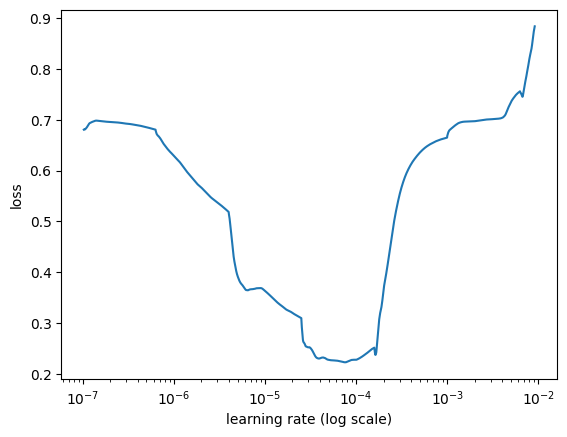

In [ ]:
ClimateBertlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
ClimateBertlearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/10
682/682 [==============================] - 340s 449ms/step - loss: 0.4597 - accuracy: 0.7639 - val_loss: 0.2245 - val_accuracy: 0.9065
Epoch 2/10
682/682 [==============================] - 311s 456ms/step - loss: 0.2063 - accuracy: 0.9235 - val_loss: 0.1984 - val_accuracy: 0.9366
Epoch 3/10
682/682 [==============================] - 311s 457ms/step - loss: 0.1111 - accuracy: 0.9622 - val_loss: 0.1522 - val_accuracy: 0.9558
Epoch 4/10
682/682 [==============================] - 304s 446ms/step - loss: 0.0659 - accuracy: 0.9778 - val_loss: 0.1989 - val_accuracy: 0.9462
Epoch 5/10
682/682 [==============================] - 311s 456ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.2359 - val_accuracy: 0.9398
Epoch 6/10
682/682 [==============================] - 304s 446ms/step - loss: 0.0294 - accuracy: 0.9914 - val_loss: 0.1585 - val_accuracy: 0.9667
Epoch 7/10
682/682 [==============================] - 304s 44

In [ ]:
ClimateBertlearner.validate(class_names=categories)

49/49 [==============================] - 15s 269ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1374
           1       0.82      0.87      0.84       188

    accuracy                           0.96      1562
   macro avg       0.90      0.92      0.91      1562
weighted avg       0.96      0.96      0.96      1562



array([[1338,   36],
       [  25,  163]])

In [ ]:
predictor = ktrain.get_predictor(ClimateBertlearner.model, preproc=trans)
#y_pred = predictor.predict(X_test)

In [ ]:
run = pd.DataFrame(Atest['index'])
run['prediction'] = y_pred
run.head(5)

,index,prediction
0,10000,1
1,10004,1
2,10012,0
3,10015,0
4,10031,0


In [ ]:
'''import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Atest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("ref.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")'''


# Ktrain mBert

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test,y_test)
model = trans.get_classifier()
CasedmBertlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 30


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 26
	99percentile : 30


Is Multi-Label? False


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
681/681 [==============================] - 596s 838ms/step - loss: 0.6773 - accuracy: 0.5742
Epoch 2/10
681/681 [==============================] - 583s 856ms/step - loss: 0.5090 - accuracy: 0.7507
Epoch 3/10
681/681 [==============================] - 582s 855ms/step - loss: 0.3030 - accuracy: 0.8731
Epoch 4/10
681/681 [==============================] - 580s 852ms/step - loss: 0.2568 - accuracy: 0.9016
Epoch 5/10
681/681 [==============================] - 580s 852ms/step - loss: 0.6686 - accuracy: 0.5585
Epoch 6/10
681/681 [==============================] - 580s 852ms/step - loss: 0.7644 - accuracy: 0.5165
Epoch 7/10
681/681 [==============================] - 121s 177ms/step - loss: 0.9371 - accuracy: 0.5103


done.
Visually inspect loss plot and select learning rate associated with falling loss


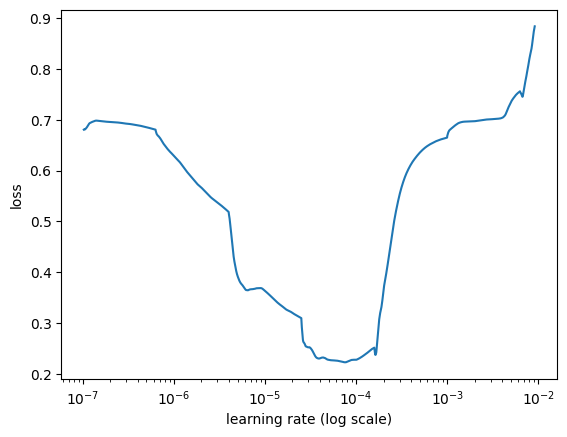

In [ ]:
CasedmBertlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
CasedmBertlearner.fit_onecycle(3e-5,15)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
682/682 [==============================] - 632s 898ms/step - loss: 0.3584 - accuracy: 0.8352 - val_loss: 0.1809 - val_accuracy: 0.9315
Epoch 2/15
682/682 [==============================] - 609s 893ms/step - loss: 0.1314 - accuracy: 0.9544 - val_loss: 0.2334 - val_accuracy: 0.9315
Epoch 3/15
682/682 [==============================] - 609s 893ms/step - loss: 0.0740 - accuracy: 0.9750 - val_loss: 0.2783 - val_accuracy: 0.9116
Epoch 4/15
682/682 [==============================] - 609s 893ms/step - loss: 0.0520 - accuracy: 0.9827 - val_loss: 0.2561 - val_accuracy: 0.9481
Epoch 5/15
682/682 [==============================] - 609s 893ms/step - loss: 0.0519 - accuracy: 0.9816 - val_loss: 0.2647 - val_accuracy: 0.9353
Epoch 6/15
682/682 [==============================] - 609s 893ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.3335 - val_accuracy: 0.9423
Epoch 7/15
682/682 [==============================] - 609s 89

In [ ]:
CasedmBertlearner.validate(class_names=categories)

49/49 [==============================] - 32s 565ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1371
           1       0.79      0.81      0.80       190

    accuracy                           0.95      1561
   macro avg       0.88      0.89      0.88      1561
weighted avg       0.95      0.95      0.95      1561



array([[1329,   42],
       [  36,  154]])

In [ ]:
predictor = ktrain.get_predictor(CasedmBertlearner.model, preproc=trans)
#y_pred = predictor.predict(X_test)

In [ ]:
run = pd.DataFrame(Atest['index'])
run['prediction'] = y_pred
run.head(5)

,index,prediction
0,10000,1
1,10004,1
2,10012,0
3,10015,0
4,10031,0


In [ ]:
'''import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Atest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("ref.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")'''


# Ktrain XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
XLlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=8)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 30


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 26
	99percentile : 30


Is Multi-Label? False


simulating training for different learning rates... this may take a few moments...

Epoch 1/10

212/212 [==============================] - 304s 1s/step - loss: 0.8070 - accuracy: 0.2709

Epoch 2/10

212/212 [==============================] - 285s 1s/step - loss: 0.3370 - accuracy: 0.8752

Epoch 3/10

212/212 [==============================] - 282s 1s/step - loss: 0.2353 - accuracy: 0.9384

Epoch 4/10

212/212 [==============================] - 282s 1s/step - loss: 0.2277 - accuracy: 0.9388

Epoch 5/10

212/212 [==============================] - 282s 1s/step - loss: 0.2376 - accuracy: 0.9384

Epoch 6/10

212/212 [==============================] - 283s 1s/step - loss: 0.2490 - accuracy: 0.9389

Epoch 7/10

212/212 [==============================] - 218s 1s/step - loss: 1.4554 - accuracy: 0.9086





done.

Visually inspect loss plot and select learning rate associated with falling loss


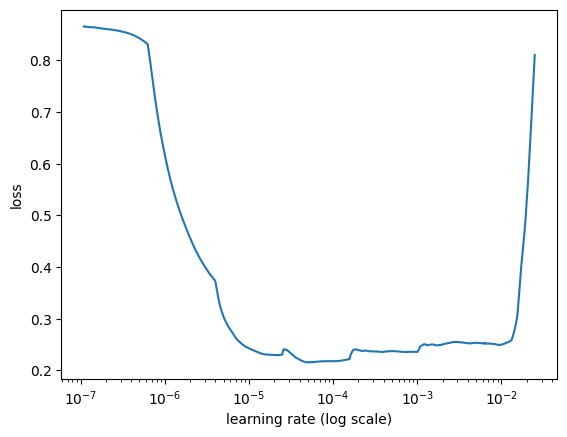

In [ ]:
XLlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
XLlearner.fit_onecycle(3e-5,15, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
1363/1363 [==============================] - 784s 540ms/step - loss: 0.8100 - accuracy: 0.5654 - val_loss: 0.7224 - val_accuracy: 0.7514
Epoch 2/15
1363/1363 [==============================] - 734s 539ms/step - loss: 0.4239 - accuracy: 0.8086 - val_loss: 0.7313 - val_accuracy: 0.7406
Epoch 3/15
1363/1363 [==============================] - 735s 539ms/step - loss: 0.3002 - accuracy: 0.8693 - val_loss: 0.3674 - val_accuracy: 0.9065
Epoch 4/15
1363/1363 [==============================] - 734s 538ms/step - loss: 0.2377 - accuracy: 0.9087 - val_loss: 0.5066 - val_accuracy: 0.8443
Epoch 5/15
1363/1363 [==============================] - 740s 543ms/step - loss: 0.2179 - accuracy: 0.9118 - val_loss: 0.3435 - val_accuracy: 0.9180
Epoch 6/15
1363/1363 [==============================] - 751s 551ms/step - loss: 0.2288 - accuracy: 0.9058 - val_loss: 0.3247 - val_accuracy: 0.9154
Epoch 7/15
1363/1363 [===========================

KeyboardInterrupt: 

In [ ]:
XLlearner.validate(class_names=categories)

49/49 [==============================] - 32s 584ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1371
           1       0.67      0.86      0.75       190

    accuracy                           0.93      1561
   macro avg       0.82      0.90      0.86      1561
weighted avg       0.94      0.93      0.93      1561



array([[1290,   81],
       [  27,  163]])

# Ktrain DistilmBert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test,y_test)
model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 30


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 26
	99percentile : 30


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 26
	99percentile : 30


Is Multi-Label? False


In [ ]:
Distillearner.lr_find(show_plot = True, max_epochs=10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
681/681 [==============================] - 306s 432ms/step - loss: 0.6666 - accuracy: 0.5949
Epoch 2/10
681/681 [==============================] - 303s 445ms/step - loss: 0.4636 - accuracy: 0.7831
Epoch 3/10
681/681 [==============================] - 303s 445ms/step - loss: 0.2498 - accuracy: 0.9063
Epoch 4/10
681/681 [==============================] - 303s 445ms/step - loss: 0.1747 - accuracy: 0.9360
Epoch 5/10
681/681 [==============================] - 301s 442ms/step - loss: 0.4413 - accuracy: 0.7590
Epoch 6/10
 26/681 [>.............................] - ETA: 4:41 - loss: 0.6895 - accuracy: 0.5484

In [ ]:
Distillearner.fit_onecycle(4e-5,15, class_weight = weight)



begin training using onecycle policy with max lr of 4e-05...
Epoch 1/15
682/682 [==============================] - 338s 467ms/step - loss: 0.7302 - accuracy: 0.6074 - val_loss: 0.8095 - val_accuracy: 0.6997
Epoch 2/15
682/682 [==============================] - 316s 463ms/step - loss: 0.3120 - accuracy: 0.8637 - val_loss: 0.4399 - val_accuracy: 0.8624
Epoch 3/15
682/682 [==============================] - 316s 463ms/step - loss: 0.1872 - accuracy: 0.9218 - val_loss: 0.5206 - val_accuracy: 0.8246
Epoch 4/15
682/682 [==============================] - 322s 473ms/step - loss: 0.1449 - accuracy: 0.9404 - val_loss: 0.3601 - val_accuracy: 0.9027
Epoch 5/15
682/682 [==============================] - 316s 463ms/step - loss: 0.1091 - accuracy: 0.9561 - val_loss: 0.4991 - val_accuracy: 0.8649
Epoch 6/15
682/682 [==============================] - 316s 463ms/step - loss: 0.0934 - accuracy: 0.9615 - val_loss: 0.2394 - val_accuracy: 0.9424
Epoch 7/15
682/682 [==============================] - 316s 46

In [ ]:
Distillearner.validate(class_names=categories)

49/49 [==============================] - 15s 277ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1374
           1       0.69      0.86      0.76       188

    accuracy                           0.94      1562
   macro avg       0.83      0.90      0.86      1562
weighted avg       0.95      0.94      0.94      1562



array([[1300,   74],
       [  26,  162]])

# Hybrid Model

In [ ]:
!pip install pytorch_pretrained_bert
!pip install tensorflow-text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model


## mBert + BiLSTM + CNN

In [ ]:
bert_preprocess2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
#BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text2 = bert_preprocess2(text_input)
outputs2 = bert_encoder2(preprocessed_text2)

In [ ]:



# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling])
dense_layer = Dense(128, activation='relu')(concat_output)
# dense_layer = Dropout(0.3)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
# dense_layer_2 = Dropout(0.3)(dense_layer_2)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['cleanText[0][0]']           
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model2.fit(X_train_over, y_train_over, epochs=10, class_weight = weight)

Epoch 1/10
341/341 [==============================] - 176s 366ms/step - loss: 0.9145 - accuracy: 0.4588 - precision: 0.4588 - recall: 1.0000
Epoch 2/10
341/341 [==============================] - 120s 351ms/step - loss: 0.8437 - accuracy: 0.4735 - precision: 0.4656 - recall: 0.9976
Epoch 3/10
341/341 [==============================] - 119s 350ms/step - loss: 0.8296 - accuracy: 0.4850 - precision: 0.4710 - recall: 0.9968
Epoch 4/10
341/341 [==============================] - 119s 350ms/step - loss: 0.8125 - accuracy: 0.5079 - precision: 0.4824 - recall: 0.9936
Epoch 5/10
341/341 [==============================] - 119s 350ms/step - loss: 0.7956 - accuracy: 0.5212 - precision: 0.4893 - recall: 0.9936
Epoch 6/10
341/341 [==============================] - 120s 351ms/step - loss: 0.7878 - accuracy: 0.5289 - precision: 0.4933 - recall: 0.9934
Epoch 7/10
341/341 [==============================] - 119s 350ms/step - loss: 0.7745 - accuracy: 0.5397 - precision: 0.4991 - recall: 0.9946
Epoch 8/10
34

In [ ]:
#model2.fit(X_train, y_train, epochs=20, class_weight = weight)

In [ ]:
model2.evaluate(X_valid, y_valid)

49/49 [==============================] - 18s 343ms/step - loss: 1.4926 - accuracy: 0.3171 - precision: 0.1513 - recall: 1.0000


[1.492630124092102, 0.31710442900657654, 0.15127389132976532, 1.0]

In [ ]:
y_predicted = model2.predict(X_test)
y_predicted = y_predicted.flatten()

49/49 [==============================] - 19s 335ms/step


In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted.shape

(1562,)

In [ ]:
accuracy_lr_valid = accuracy_score(y_test, y_predicted)
classification_report_lr_valid = classification_report(y_test, y_predicted, digits = 4)

print(f'LR Accuracy on Test Set: {accuracy_lr_valid}')
print('Classification Report for LR on Test Set:\n', classification_report_lr_valid)


LR Accuracy on Validation Set: 0.323303457106274
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           0     0.9877    0.2336    0.3779      1374
           1     0.1487    0.9787    0.2582       188

    accuracy                         0.3233      1562
   macro avg     0.5682    0.6062    0.3181      1562
weighted avg     0.8867    0.3233    0.3635      1562



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 321, 1053],
       [   4,  184]])

Text(50.722222222222214, 0.5, 'Truth')

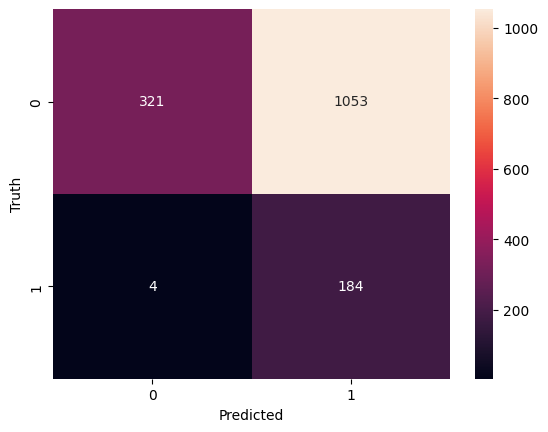

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#print(classification_report(y_valid, y_predicted))

## BiLSTM + mBERT


In [ ]:
bert_preprocess_mbert =  hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder_mbert = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

# BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text_mbert = bert_preprocess_mbert(text_input)
outputs_mbert = bert_encoder_mbert(preprocessed_text_mbert)

# BERT embeddings
bert_embedding_mbert = outputs_mbert['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding_mbert = Dropout(0.2)(bert_embedding_mbert)

# Reshape BERT embeddings to a 3D tensor
bert_embedding_mbert = Reshape((-1, 768))(bert_embedding_mbert)
#bert_embedding_mbert = Reshape((-1, 512))(bert_embedding_mbert)  # Replace 512 with the actual hidden size

# Bidirectional LSTM layer
lstm_output_mbert = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding_mbert)

# Pooling layers
avg_pooling_mbert = GlobalAveragePooling1D()(lstm_output_mbert)
max_pooling_mbert = GlobalMaxPooling1D()(lstm_output_mbert)

# Concatenate and additional dense layers
concat_output_mbert = concatenate([avg_pooling_mbert, max_pooling_mbert])
dense_layer_mbert = Dense(128, activation='relu')(concat_output_mbert)
dense_layer_mbert = Dropout(0.3)(dense_layer_mbert)

# Additional Dense layer
dense_layer_2_mbert = Dense(64, activation='relu')(dense_layer_mbert)
dense_layer_2_mbert = Dropout(0.3)(dense_layer_2_mbert)

# Output layer
output_layer_mbert = Dense(1, activation='sigmoid')(dense_layer_2_mbert)

# Connect the input and output layers to create the model
model_mbert = Model(inputs=text_input, outputs=output_layer_mbert)

model_mbert.summary()

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model_mbert.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=METRICS)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_mask': (None, 128)   0         ['cleanText[0][0]']           
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [ ]:
model_mbert.fit(X_train_over, y_train_over, epochs=10)

Epoch 1/10
341/341 [==============================] - 131s 349ms/step - loss: 0.6418 - accuracy: 0.6131 - precision: 0.6134 - recall: 0.4236
Epoch 2/10
341/341 [==============================] - 119s 349ms/step - loss: 0.5805 - accuracy: 0.6823 - precision: 0.6793 - recall: 0.5822
Epoch 3/10
341/341 [==============================] - 119s 349ms/step - loss: 0.5709 - accuracy: 0.6921 - precision: 0.6823 - recall: 0.6154
Epoch 4/10
341/341 [==============================] - 126s 370ms/step - loss: 0.5587 - accuracy: 0.7000 - precision: 0.6895 - recall: 0.6294
Epoch 5/10
341/341 [==============================] - 120s 352ms/step - loss: 0.5464 - accuracy: 0.7096 - precision: 0.6934 - recall: 0.6578
Epoch 6/10
341/341 [==============================] - 119s 349ms/step - loss: 0.5393 - accuracy: 0.7149 - precision: 0.6966 - recall: 0.6708
Epoch 7/10
341/341 [==============================] - 119s 349ms/step - loss: 0.5306 - accuracy: 0.7245 - precision: 0.7139 - recall: 0.6664
Epoch 8/10
34

In [ ]:
model_mbert.evaluate(X_valid, y_valid)

y_predicted_mbert = model_mbert.predict(X_test)
y_predicted_mbert = y_predicted_mbert.flatten()

y_predicted_mbert = np.where(y_predicted_mbert > 0.5, 1, 0)
y_predicted_mbert.shape

49/49 [==============================] - 18s 336ms/step


(1562,)

In [ ]:
accuracy_lr_valid = accuracy_score(y_test, y_predicted_mbert)
classification_report_lr_valid = classification_report(y_test, y_predicted_mbert, digits = 4)

print(f'LR Accuracy on Test Set: {accuracy_lr_valid}')
print('Classification Report for LR on Test Set:\n', classification_report_lr_valid)


LR Accuracy on Test Set: 0.853393085787452
Classification Report for LR on Test Set:
               precision    recall  f1-score   support

           0     0.9666    0.8632    0.9120      1374
           1     0.4388    0.7819    0.5621       188

    accuracy                         0.8534      1562
   macro avg     0.7027    0.8225    0.7370      1562
weighted avg     0.9031    0.8534    0.8699      1562



Text(50.722222222222214, 0.5, 'Truth')

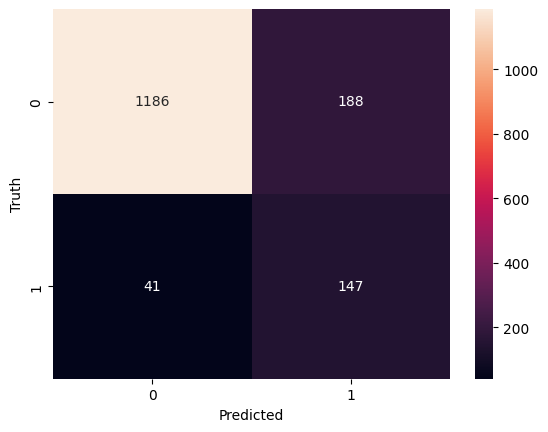

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm_mbert = confusion_matrix(y_test, y_predicted_mbert)
cm_mbert

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm_mbert, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#print(classification_report(y_test, y_predicted_mbert))